# Packages

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
plt.rcParams['font.size'] = 16  

# Functions

In [78]:
def load_data(file_name:str, skiprows:int = 0):
  """Loads the data we want to work with

  Args:
      file_name (str): The name of the file we want to work with.

  Returns:
      pandas.DataFrame: A table containing the information we want to explore.
  """
  columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "class"
  ]
  return pd.read_csv(file_name, names=columns, skiprows=skiprows, sep=", ")

# Load the data

In [79]:
# main database, which we will explore and create the model
main_data = load_data("./data/adult.data")
# test data, which we will test the model
test_data = load_data("./data/adult.test", skiprows=1)

<ipython-input-78-680989803536>:27: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return pd.read_csv(file_name, names=columns, skiprows=skiprows, sep=", ")


# Main data

Lets take a look at the data.

In [80]:
main_data.select_dtypes('object')

workclass   education      marital-status         occupation  \
0             State-gov   Bachelors       Never-married       Adm-clerical   
1      Self-emp-not-inc   Bachelors  Married-civ-spouse    Exec-managerial   
2               Private     HS-grad            Divorced  Handlers-cleaners   
3               Private        11th  Married-civ-spouse  Handlers-cleaners   
4               Private   Bachelors  Married-civ-spouse     Prof-specialty   
...                 ...         ...                 ...                ...   
32556           Private  Assoc-acdm  Married-civ-spouse       Tech-support   
32557           Private     HS-grad  Married-civ-spouse  Machine-op-inspct   
32558           Private     HS-grad             Widowed       Adm-clerical   
32559           Private     HS-grad       Never-married       Adm-clerical   
32560      Self-emp-inc     HS-grad  Married-civ-spouse    Exec-managerial   

        relationship   race     sex native-country  class  
0      Not-in-family  White    Male  United-States  <=50K  
1            Husband  White    Male  United-States  <=50K  
2      Not-in-family  White    Male  United-States  <=50K  
3            Husband  Black    Male  United-States  <=50K  
4               Wife  Black  Female           Cuba  <=50K  
...              ...    ...     ...            ...    ...  
32556           Wife  White  Female  United-States  <=50K  
32557        Husband  White    Male  United-States   >50K  
32558      Unmarried  White  Female  United-States  <=50K  
32559      Own-child  White    Male  United-States  <=50K  
32560           Wife  White  Female  United-States   >50K  

[32561 rows x 9 columns]

In [102]:
main_data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  class  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [82]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [100]:
main_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

We have 32561 entries (rows) and a total of 15 columns:

- 14 features:
  - age
  - workclass
  - fnlwgt - the weight assigned to the combination of features (an estimate of how many people belong to this set of combination)
  - education
  - education-num
  - marital-status
  - occupation
  - relationship
  - race
  - sex
  - capital-gain
  - capital-loss
  - hours-per-week
  - native-country
<br><br>
- 1 target
  - class

# Basic statistics from numerical features

As part of a first inspection, is worth to check the basic statistics of the numerical attributes from the data.

In [106]:
main_data.describe().round(3)

age       fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000    32561.000      32561.000     32561.000     32561.000   
mean      38.582   189778.367         10.081      1077.649        87.304   
std       13.640   105549.978          2.573      7385.292       402.960   
min       17.000    12285.000          1.000         0.000         0.000   
25%       28.000   117827.000          9.000         0.000         0.000   
50%       37.000   178356.000         10.000         0.000         0.000   
75%       48.000   237051.000         12.000         0.000         0.000   
max       90.000  1484705.000         16.000     99999.000      4356.000   

       hours-per-week  
count       32561.000  
mean           40.437  
std            12.347  
min             1.000  
25%            40.000  
50%            40.000  
75%            45.000  
max            99.000

From these values, we can note that is likely that `fnlwgt` have outliers, since there is a big difference between the 75% percentile and the max value. Also, for the attributes `capital-gain`, and `capital-loss` we probably have outliers too, since values until the 75% percentile are zero.

To check this more properly, we can use a `boxplot`.

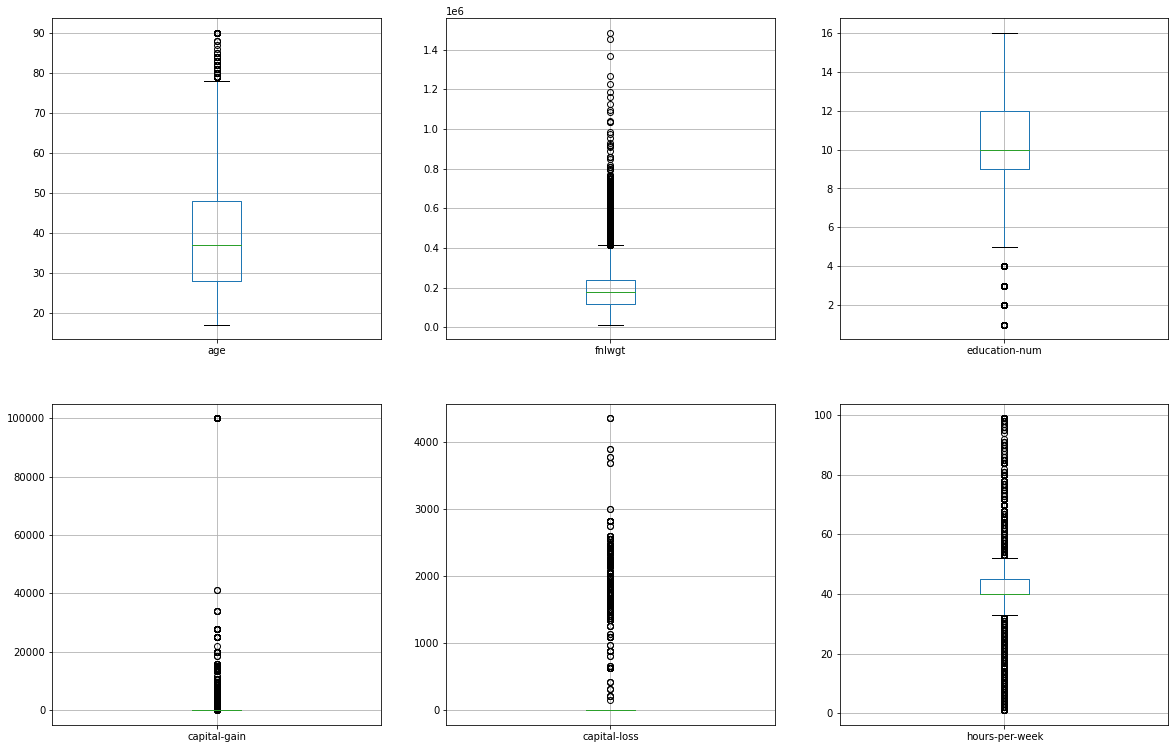

In [172]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20,13))

for counter, ax in enumerate(fig.get_axes()):
  column = main_data.select_dtypes('int64').columns[counter]
  pd.DataFrame(main_data[column]).boxplot(ax=ax)

# Attributes distributions

Lets take a look at the distribution of each attribute.

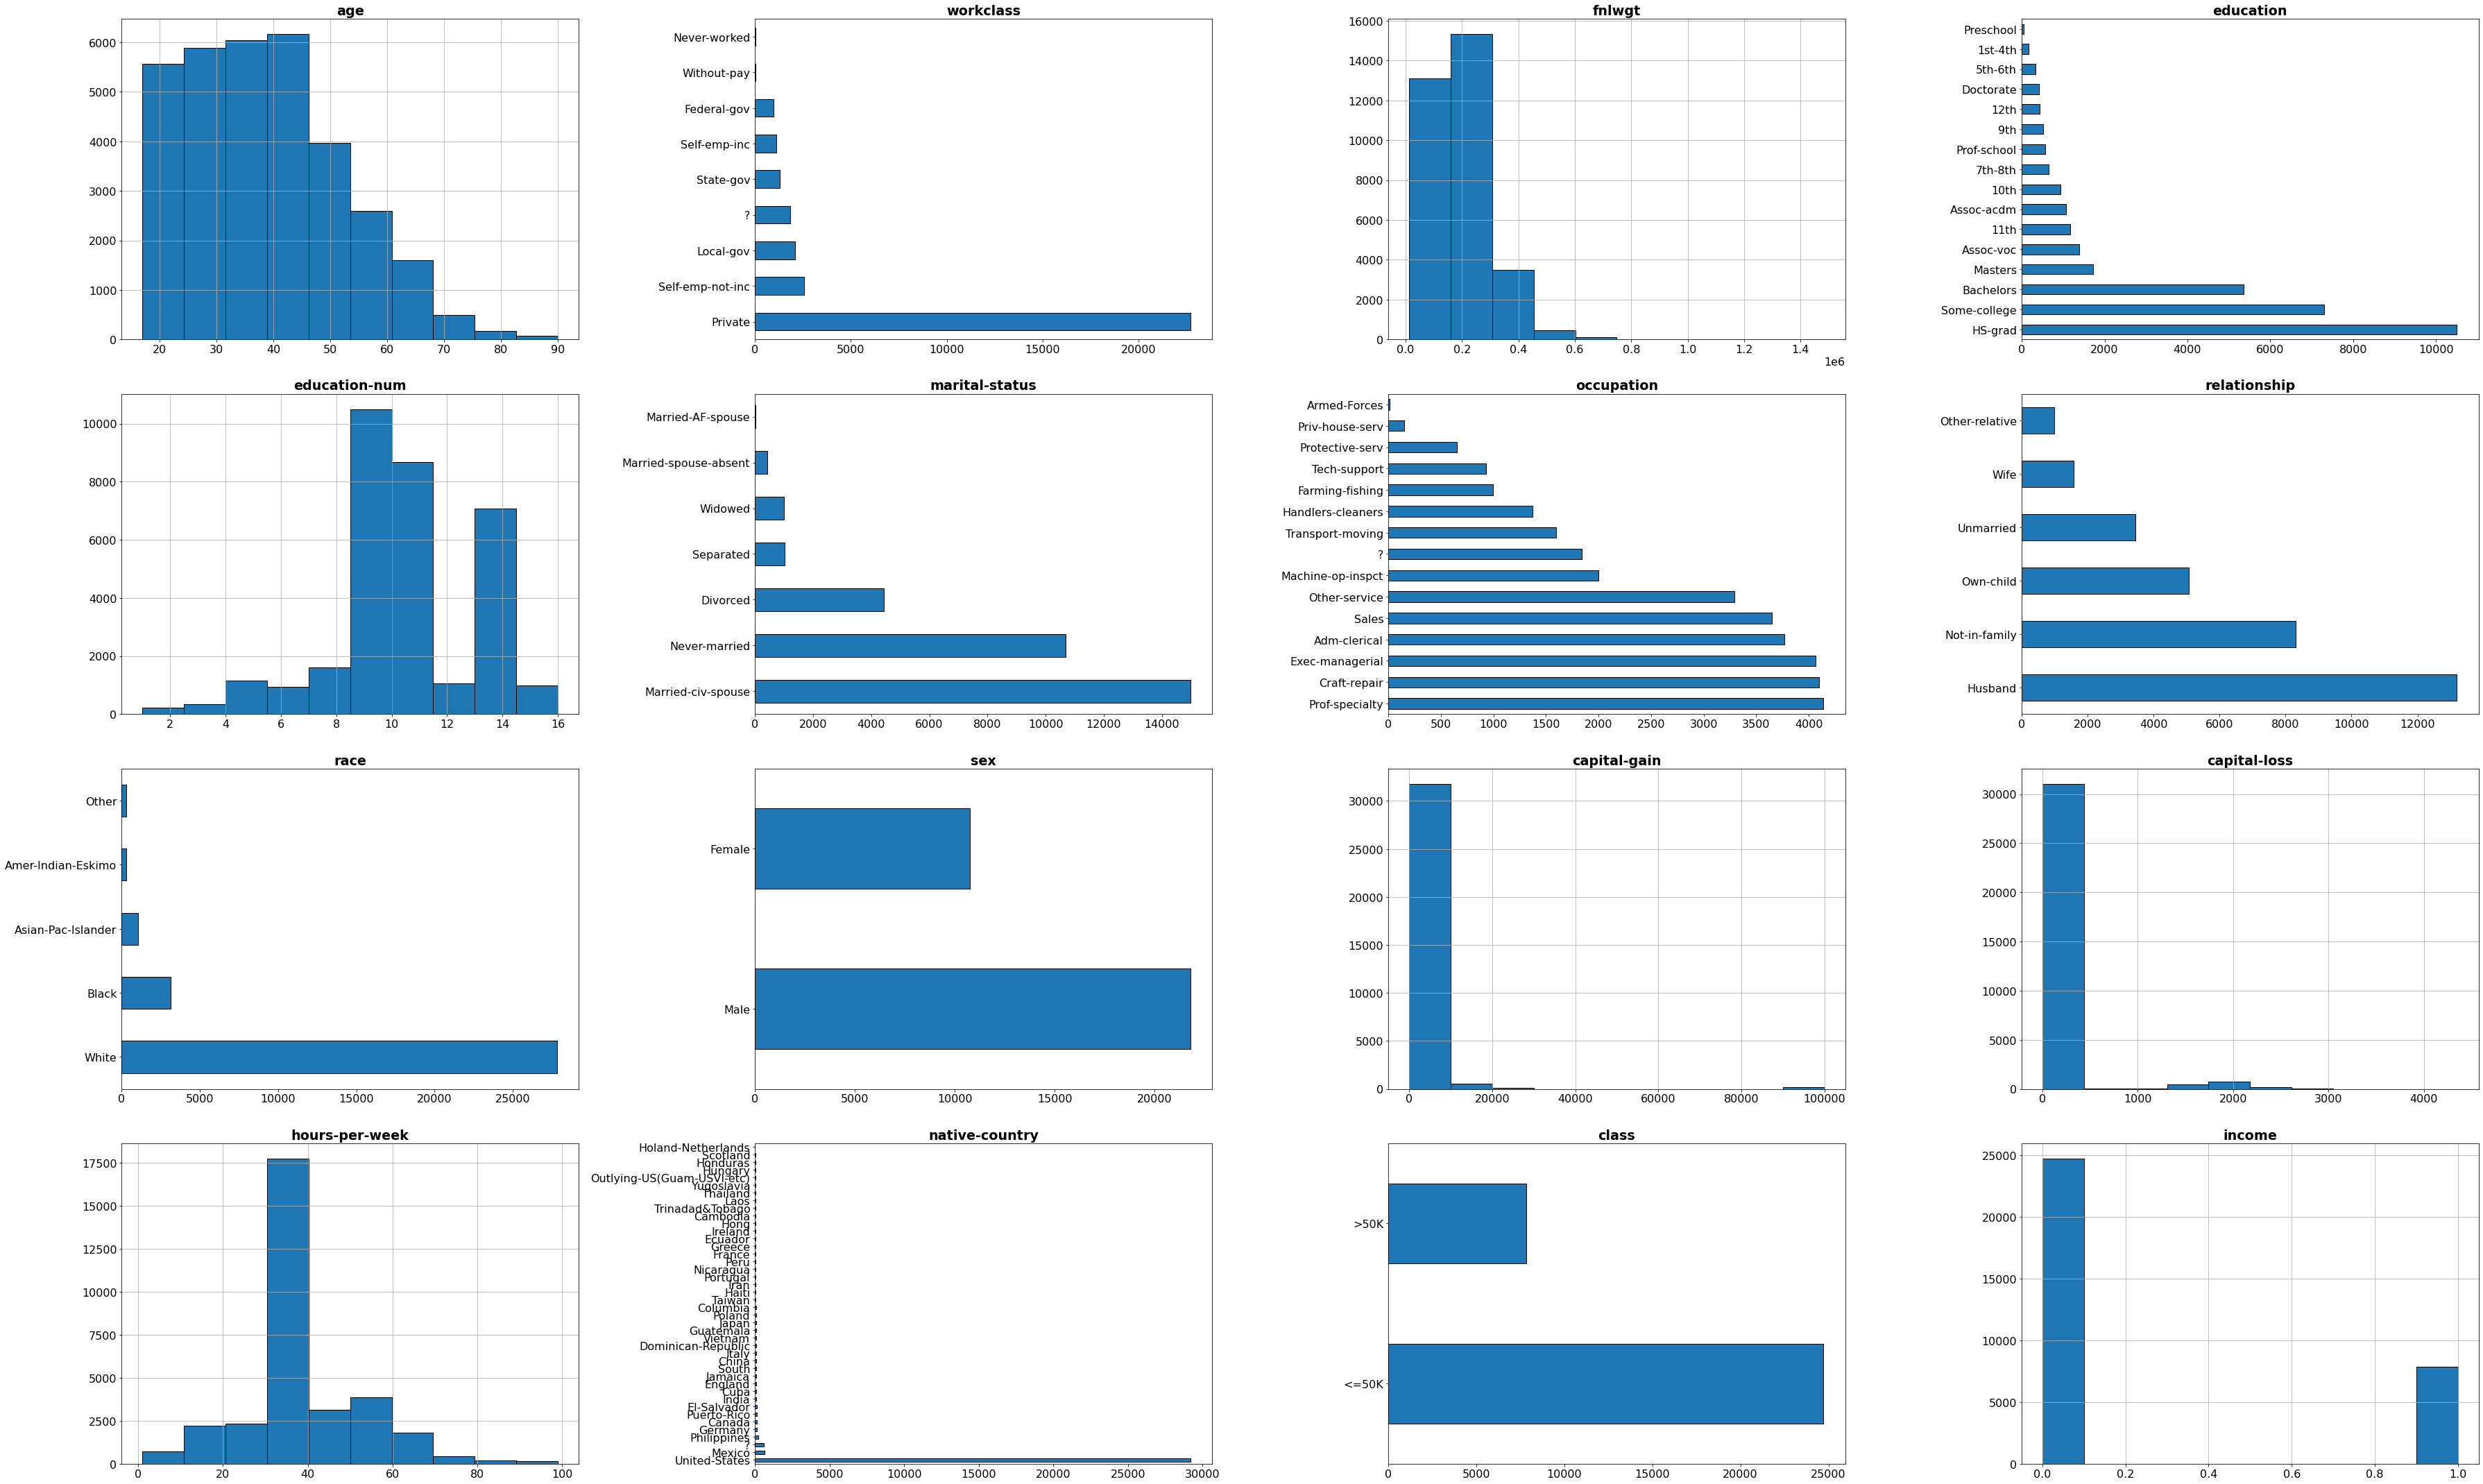

In [303]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(50,30))

for counter, ax in enumerate(fig.get_axes()):
  column = main_data.columns[counter]
  if main_data.dtypes[column] == 'int64':
    main_data[column].hist(edgecolor='k', ax=ax)
  else:
    main_data[column].value_counts().plot.barh(edgecolor='k', ax=ax)
  
  ax.set_title(column, weight="bold")
  
  
fig.tight_layout()
fig.savefig("./figures/basic_distributions.pdf", bbox_inches='tight')
fig.savefig("./figures/basic_distributions.png", bbox_inches='tight')

#### First issue

First I noticed that attributes `workclass`, `occupation`, and `native-country` have undefined entries, denoted by `?`. If we look at the percentage they represent in each attribute we obtain:

In [98]:
print(f"""
      workclass = "?": {round(100*sum(main_data['workclass'] == '?')/main_data.shape[0], 2)} %
      occupation = "?": {round(100*sum(main_data['occupation'] == '?')/main_data.shape[0], 2)} %
      native_country = "?": {round(100*sum(main_data['native-country'] == '?')/main_data.shape[0], 2)} %
      """)      


      workclass = "?": 5.64 %
      occupation = "?": 5.66 %
      native_country = "?": 1.79 %
      


When we stumble upon such problem, we can replace the missing values with the most frequent ones for `categorical` or by the mean value if they are `numerical`. Another possibility is to drop these values. 

#### Second issue

Another issue I found was that in the attribute `native-country` the majority is from the `United States` and we have very few from other countries, less than 2.0%:

In [97]:
round(100*main_data['native-country'].value_counts() / main_data.shape[0], 2)

United-States                 89.59
Mexico                         1.97
?                              1.79
Philippines                    0.61
Germany                        0.42
Canada                         0.37
Puerto-Rico                    0.35
El-Salvador                    0.33
India                          0.31
Cuba                           0.29
England                        0.28
Jamaica                        0.25
South                          0.25
China                          0.23
Italy                          0.22
Dominican-Republic             0.21
Vietnam                        0.21
Guatemala                      0.20
Japan                          0.19
Poland                         0.18
Columbia                       0.18
Taiwan                         0.16
Haiti                          0.14
Iran                           0.13
Portugal                       0.11
Nicaragua                      0.10
Peru                           0.10
France                      

**I would solve this by grouping all other countries into a category called `other`, reducing cardinality of this attribute.**

# Comments about the distributions

### Interlude

Here we are going to follow the sequence of columns that appear in the data and make brief comments about their characteristics.

In [148]:
main_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

### age

As we can see from the plot in the section `Attributes distributions`:
- The `age` varies between 20 and 90 years;
- Most of the values are between 20 and 50;
- It does not have missing values.

### workclass

In [ ]:
main_data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

We have 9 different types of `workclass`.

In [126]:
set(main_data[main_data["occupation"] == "?"].index) - set(main_data[main_data["workclass"] == "?"].index)

{5361, 10845, 14772, 20337, 23232, 32304, 32314}

In [127]:
main_data.iloc[[5361, 10845, 14772, 20337, 23232, 32304, 32314]]

age     workclass  fnlwgt     education  education-num  \
5361    18  Never-worked  206359          10th              6   
10845   23  Never-worked  188535       7th-8th              4   
14772   17  Never-worked  237272          10th              6   
20337   18  Never-worked  157131          11th              7   
23232   20  Never-worked  462294  Some-college             10   
32304   30  Never-worked  176673       HS-grad              9   
32314   18  Never-worked  153663  Some-college             10   

           marital-status occupation   relationship   race     sex  \
5361        Never-married          ?      Own-child  White    Male   
10845            Divorced          ?  Not-in-family  White    Male   
14772       Never-married          ?      Own-child  White    Male   
20337       Never-married          ?      Own-child  White  Female   
23232       Never-married          ?      Own-child  Black    Male   
32304  Married-civ-spouse          ?           Wife  Black  Female   
32314       Never-married          ?      Own-child  White    Male   

       capital-gain  capital-loss  hours-per-week native-country  class  
5361              0             0              40  United-States  <=50K  
10845             0             0              35  United-States  <=50K  
14772             0             0              30  United-States  <=50K  
20337             0             0              10  United-States  <=50K  
23232             0             0              40  United-States  <=50K  
32304             0             0              40  United-States  <=50K  
32314             0             0               4  United-States  <=50K

- As mentioned before, about 5% of the values are missing (`?`).
- The majority of people belong to `Private` class;
- When `workclass` is either `?` or `Nerver-worked`, the `occupation` is `?`.

### fnlwgt

### education

In [130]:
main_data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

- We have 16 different categories for `education`;
- We have no missing values;
- The majority went to High School, followed by those who went to college and those who got a bachelor's degree.

### education-num

In [132]:
main_data['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

Once again, we notice that we have 16 distinct values, but this time they are numeric.

In [145]:
pd.concat([
  pd.DataFrame(main_data["education"].value_counts()).reset_index(),
  pd.DataFrame(main_data["education-num"].value_counts()).reset_index()
], axis=1)


index  education  index  education-num
0        HS-grad      10501      9          10501
1   Some-college       7291     10           7291
2      Bachelors       5355     13           5355
3        Masters       1723     14           1723
4      Assoc-voc       1382     11           1382
5           11th       1175      7           1175
6     Assoc-acdm       1067     12           1067
7           10th        933      6            933
8        7th-8th        646      4            646
9    Prof-school        576     15            576
10           9th        514      5            514
11          12th        433      8            433
12     Doctorate        413     16            413
13       5th-6th        333      3            333
14       1st-4th        168      2            168
15     Preschool         51      1             51

Note that the numbers in the columns `education` and `education-num` are equal. This means that the numerical categories within the attribute `education-num` correspond to the classes from the `education` attribute.

### marital-status

In [147]:
main_data['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

- This attribute has 7 different classes;
- There are no missing values;
- The majority lies within the `Married-civ-spouse` class followed by those who `Never-married`.

### occupation

In [151]:
main_data["occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

- We have 15 different classes, including the one `?`;
- About 6% of the values are missing, as we have discussed in the `workclass` section.

### relationship

In [152]:
main_data["relationship"].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

- We have 6 different classes;
- `Husband` is the most frequent, followed by those who are `Not-in-family`;
- We have no missing values for this attribute.

### race

In [153]:
main_data['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

- We have 5 different classes;
- The predominant is `White` followed by `Black`.
- We have no missing values;

### sex

In [154]:
main_data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

- We have two genders;
- The predominant one is `Male`;
- We have no missing values;

### capital-gain

As we can see from the plot in the section `Attributes distributions`:
- The majority of values are set as zero.

### capital-loss

As we can see from the plot in the section `Attributes distributions`:
- The majority of values are set as zero.

Although `capital-gain` and `capital-loss` have most of their values set to zero, they are not correlated:

In [156]:
main_data[['capital-gain', 'capital-loss']].corr()

capital-gain  capital-loss
capital-gain      1.000000     -0.031615
capital-loss     -0.031615      1.000000

<AxesSubplot:xlabel='capital-gain', ylabel='capital-loss'>

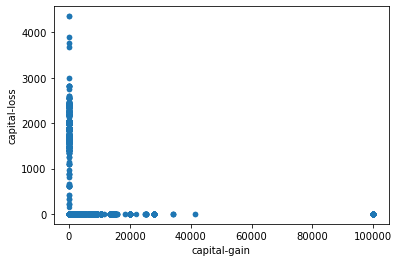

In [157]:
main_data.plot.scatter(x='capital-gain', y='capital-loss')

### hours-per-week

As we can see from the plot in the section `Attributes distributions`:
- The worked hours varies between 1 and 90 hours;
- Most people work 40 hours;
- It does not have missing values.

### native-country

As mentioned before, the majority, about 90% of the people are from the United States. The rest are scattered in other 41 countries, including missing values `?`.

### class

In [161]:
main_data['class'].value_counts()

<=50K    24720
>50K      7841
Name: class, dtype: int64

In [173]:
round(100*main_data['class'].value_counts() / main_data.shape[0], 2)

<=50K    75.92
>50K     24.08
Name: class, dtype: float64

We can observe that our `target` is umbalanced since about 76% belong to the category `<=50K` while the rest belong to `>50K`. 

We can approach this problem using two techniques:
- undersampling the predominant category;
- oversampling the category with fewer values;

**For this problem in particular, I would use the oversampling technique, because if we choose to undersampling we would lose about 50% of the data.**

# class distribution according to the features

Here we are going to explore how the `class` distributed among the features we have.

In [233]:
def create_class_feature_comparison_data(feature:str):
  tmp_df = pd.DataFrame(main_data[[feature, 'class']].value_counts()).reset_index().sort_values(by=feature)
  index = tmp_df[feature].unique()

  less_than_50_list = []
  greater_than_50_list = []

  for value in index:
    df_less = tmp_df[(tmp_df[feature] == value) & (tmp_df['class'] == '>50K')]
    df_greater = tmp_df[(tmp_df[feature] == value) & (tmp_df['class'] != '>50K')]
    if df_less.shape[0] != 0:
      less_than_50_list.append(df_less[0].iloc[0])
    else:
      less_than_50_list.append(0)
    if df_greater.shape[0] != 0:
      greater_than_50_list.append(df_greater[0].iloc[0])
    else:
      greater_than_50_list.append(0)
    
  return pd.DataFrame({
    '>50K': greater_than_50_list,
    '<=50K': less_than_50_list
  }, index=index)

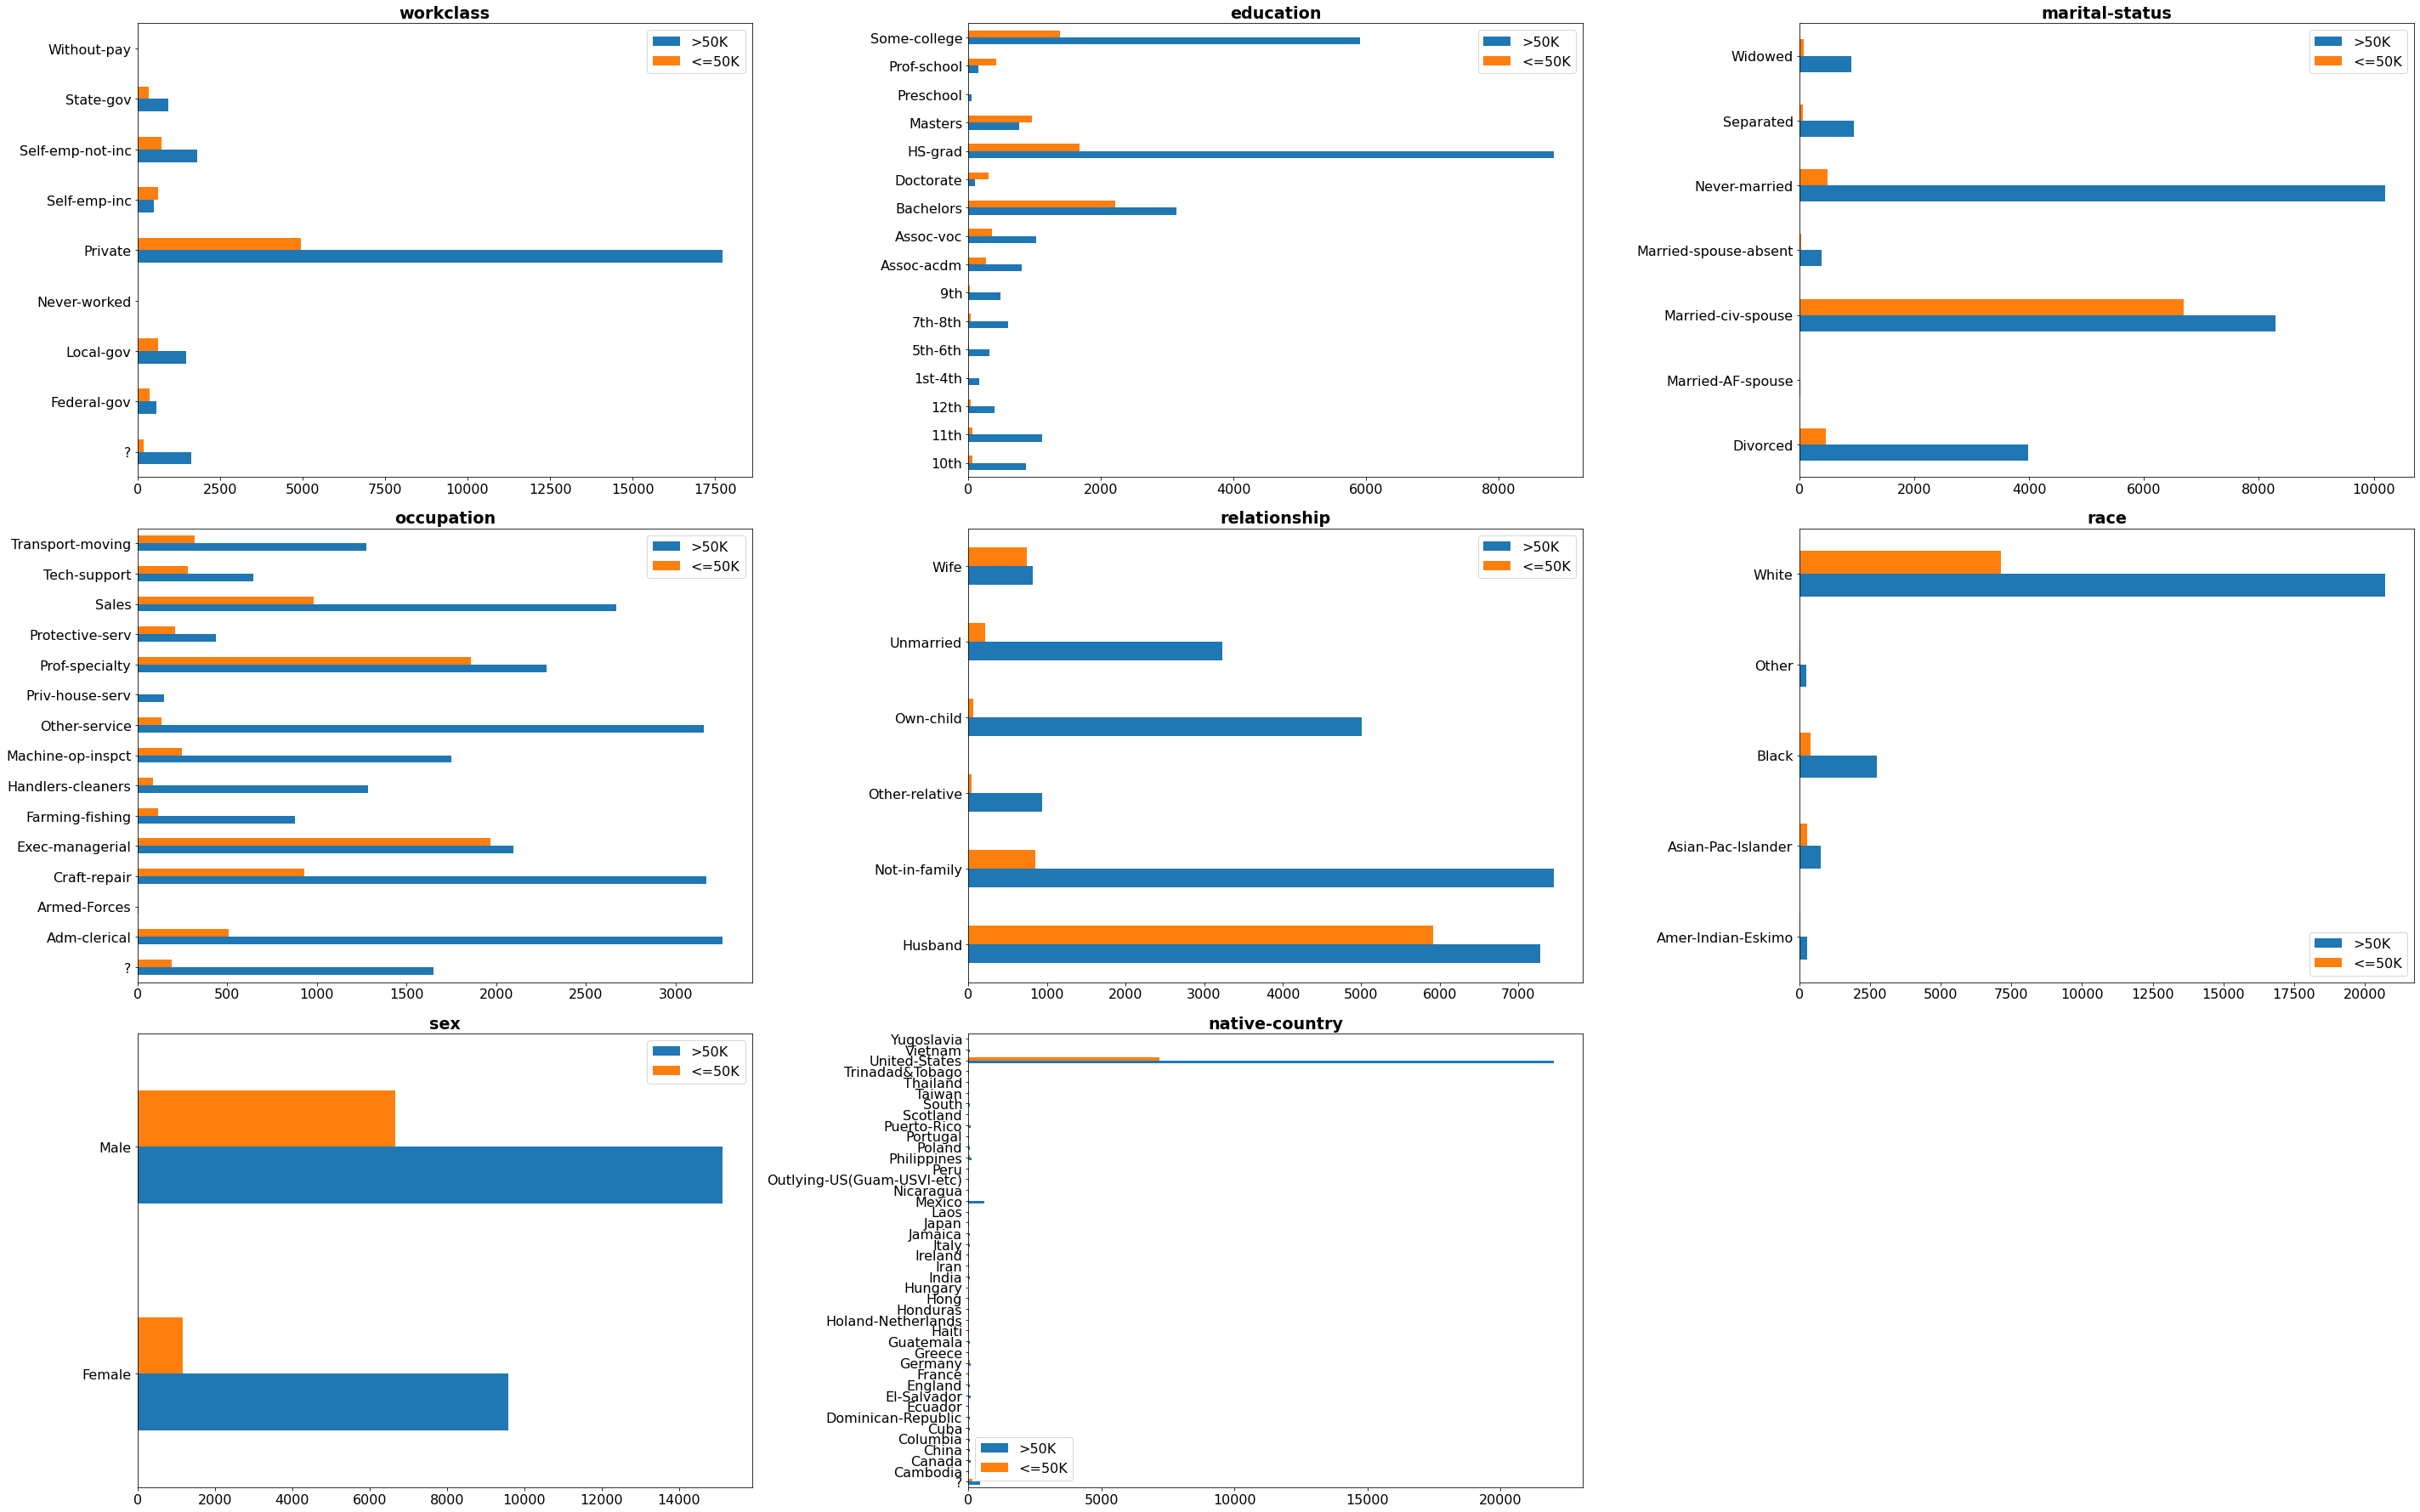

In [300]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(40, 25))

for counter, ax in enumerate(fig.get_axes()):
  column = main_data.select_dtypes('object').columns[counter]
  if column != 'class':
    create_class_feature_comparison_data(feature=column).plot.barh(ax=ax)
    ax.set_title(column, weight='bold')
fig.tight_layout()
fig.delaxes(ax)

fig.savefig("./figures/correlation_with_income.pdf", bbox_inches='tight')
fig.savefig("./figures/correlation_with_income.png", bbox_inches='tight')

- `workclass`:
  - people who work in the `Private` sector are the majority within the class `>50K`;
<br><br>

- `education`:
  - people with `HS-grad` are the majority within the class `>50K`;
  - in second we have `Some-college` and in third `Bachalors` with more people earning `>50K`;
  - **the amount of money earned is correlated to the level of education**;
<br><br>

- `marital-status`:
  - those who `Never-married` tend to earn more money;
  - for `Married-civ-spouse` the class is well distributed;
  - `Divorced` people also tend to earn more money;
<br><br>

- `occupation`:
  - the class is well distributed for `Prof-specialty` and `Exec-managerial`;
  - the rest of the occupations tend to make more money, i.e., are in the `>50K` class;
<br><br>

- `relationship`:
  - `Wife` is the category well distributed;
  - `Husband` almost has a well distrubuted class, althoug some of then earn `>50K`;
  - the other categories all tend to earn more money;
<br><br>

- `race`:
  - `White` people tend to earn more money followed by the `Black` ones;
<br><br>

- `sex`:
  - `Males` tend to earn more money;
<br><br>

- `native-country`:
  - the data is predominant for the United States, and these people have a better chance of earn more money.

Another interesting question we can ask is that the correlation between the amount the people earn according to their age and how much they work, since as we get older we want to work less.

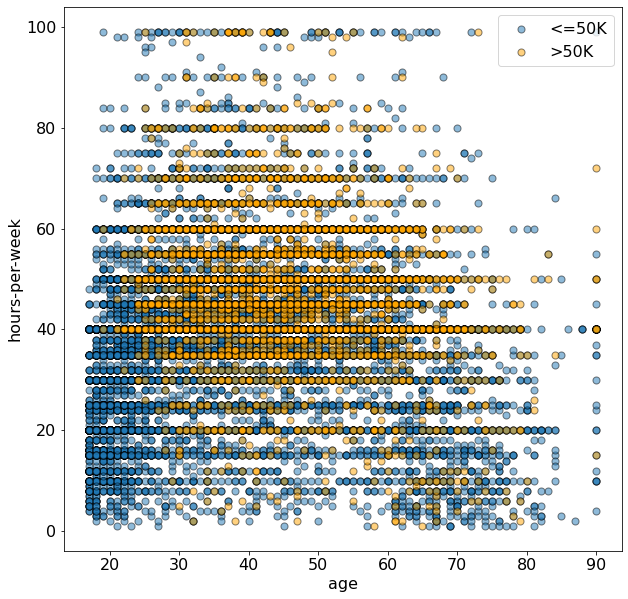

In [294]:
fig, ax = plt.subplots(figsize=(10,10))
kwargs = dict(alpha=0.5, edgecolor='black', s=50, ax=ax)
main_data[main_data['class'] == "<=50K"].plot.scatter(x='age', y='hours-per-week', **kwargs)
main_data[main_data['class'] != "<=50K"].plot.scatter(x='age', y='hours-per-week', color='orange', **kwargs)
ax.legend(["<=50K", ">50K"])

fig.savefig("./figures/age_hour_per_week_corr.pdf", bbox_inches='tight')
fig.savefig("./figures/age_hour_per_week_corr.png", bbox_inches='tight')

- people with less than 30 years tend to earn less money, they have to work more hours to be within the class `>50K`;
- most of the people who earn more are between 30 and 60 years old and work between 40 and 60 hours per week.

# Correlation between the numerical values

We are going to label the `class` in the following manner:
  - `<=50K` = 0;
  - ` >50K` = 1.

This will enable us to check for correlations between our `target` and the numerical features.

In [268]:
main_data['income'] = main_data['class'].map({'<=50K': 0, '>50K': 1})

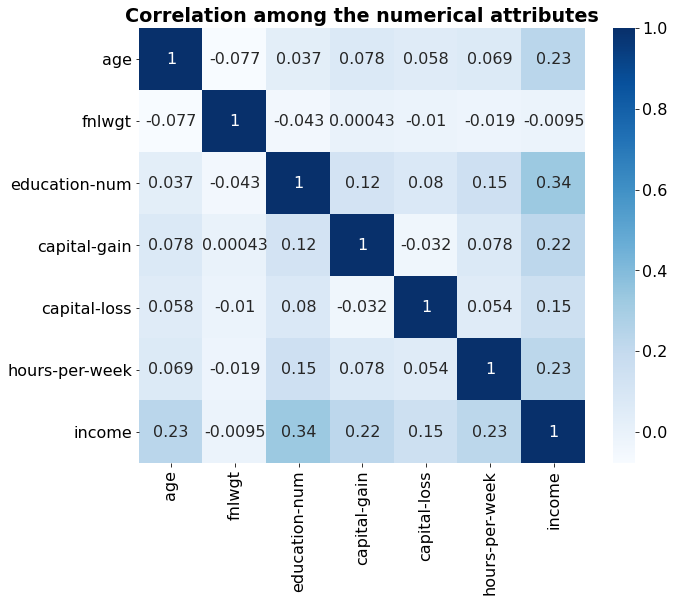

In [298]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(main_data.corr(), annot=True, cmap="Blues", ax=ax)

ax.set_title("Correlation among the numerical attributes", weight="bold")

fig.savefig("./figures/numerical_attr_corr.pdf", bbox_inches="tight")
fig.savefig("./figures/numerical_attr_corr.png", bbox_inches="tight")

- We can see that the correlations are moderate, with higher values for `education-num versus income`, `age versus income`, and `hours-per-week versus income`.